In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [2]:
df_original = pd.read_csv('SteamCharts.csv')
df = df_original.copy()

/Users/eduardomedina/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6,27,29,31,52,67,111) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = df.replace(np.nan,-1)

In [4]:
df = df.loc[df['Peak_Players'] == 1]
df_dummy = df_original.loc[df_original['Peak_Players'] == 1]

In [5]:
df.columns.values[6:]
for i in df.columns.values[6:]:
    df[i]=df[i].astype(float)

In [6]:
lista = []
for i in df.index:
    if (df.loc[i].values[6:].max() == 0) or (df.loc[i].values[6:].max() < 1000):
        lista.append(i)

print('the number of values lost due to having zeroes and less than 100 is ',len(lista))

df = df.drop(lista)
df = df.drop(df.loc[df['April_2021'] == -1].index)
df = df.rename(columns={"Last_30_Days": "May_2021"}, errors="raise")

the number of values lost due to having zeroes and less than 100 is  9860


In [7]:
len(df_dummy) - len(df)

9947

In [8]:
len(df)

2578

In [9]:
#Remove "_" from column dates
old = list(df.columns.values[6:])
new = []
for i in old:
    new.append(i.replace("_"," "))
new


# Make dictionary to change columns
dic = {}

for key in range(len(old)):
    dic[old[key]] = new[key]

#Replace columns
df = df.rename(columns=dic)



In [10]:
def days_to_glory(index):
#Find when it was released
    c = 0
    flag = False
    for i in list(df.loc[index].values):
        if (type(i) == type(np.array([.1])[0])):
            if i < 0:
                release =  pd.Timestamp(df.columns[c-1]) 
                flag = True
                break
        c +=1
    if flag == False:
        release = pd.Timestamp(df.columns[-1]) 
#Find when it reached maximum
    c = -1 
    for i in reversed(list(df.loc[index].values)):
        if i == df.loc[index].values[3:].max():
            maximum = pd.Timestamp(df.columns[c])
            break
        c -= 1
    x = str(maximum - release)
    return float(x.split(' ')[0])


In [11]:
days = []
games = []
c = 0
for i in df.index:
    c += 1
    print(c/len(df)*100)
    if days_to_glory(i) >= 0:
        days.append(days_to_glory(i))
    if days_to_glory(i) == 0:
        games.append(i)
        


0.038789759503491075
0.07757951900698215
0.11636927851047324
0.1551590380139643
0.1939487975174554
0.23273855702094648
0.27152831652443754
0.3103180760279286
0.3491078355314197
0.3878975950349108
0.42668735453840184
0.46547711404189296
0.504266873545384
0.5430566330488751
0.5818463925523661
0.6206361520558572
0.6594259115593484
0.6982156710628394
0.7370054305663305
0.7757951900698216
0.8145849495733126
0.8533747090768037
0.8921644685802949
0.9309542280837859
0.9697439875872769
1.008533747090768
1.047323506594259
1.0861132660977502
1.1249030256012413
1.1636927851047323
1.2024825446082235
1.2412723041117144
1.2800620636152056
1.3188518231186968
1.3576415826221877
1.3964313421256789
1.4352211016291698
1.474010861132661
1.5128006206361522
1.5515903801396431
1.590380139643134
1.6291698991466252
1.6679596586501164
1.7067494181536074
1.7455391776570985
1.7843289371605897
1.8231186966640807
1.8619084561675718
1.900698215671063
1.9394879751745537
1.978277734678045
2.017067494181536
2.0558572536

17.339022498060512
17.377812257564003
17.416602017067497
17.455391776570988
17.49418153607448
17.53297129557797
17.57176105508146
17.61055081458495
17.64934057408844
17.688130333591932
17.726920093095423
17.765709852598913
17.804499612102408
17.8432893716059
17.88207913110939
17.92086889061288
17.95965865011637
17.99844840961986
18.037238169123352
18.076027928626843
18.114817688130334
18.153607447633824
18.192397207137315
18.231186966640806
18.2699767261443
18.30876648564779
18.34755624515128
18.386346004654772
18.425135764158263
18.463925523661754
18.502715283165244
18.541505042668735
18.580294802172226
18.619084561675717
18.657874321179207
18.6966640806827
18.735453840186192
18.774243599689683
18.813033359193174
18.851823118696664
18.890612878200155
18.929402637703646
18.968192397207137
19.006982156710627
19.045771916214118
19.08456167571761
19.1233514352211
19.162141194724594
19.200930954228085
19.239720713731575
19.278510473235066
19.317300232738557
19.356089992242048
19.3948797517

34.71683475562452
34.755624515128005
34.7944142746315
34.833204034134994
34.87199379363848
34.910783553141975
34.94957331264546
34.98836307214896
35.027152831652444
35.06594259115594
35.104732350659425
35.14352211016292
35.182311869666414
35.2211016291699
35.259891388673395
35.29868114817688
35.33747090768038
35.376260667183864
35.41505042668736
35.453840186190845
35.49262994569434
35.53141970519783
35.57020946470132
35.608999224204815
35.6477889837083
35.6865787432118
35.725368502715284
35.76415826221878
35.802948021722266
35.84173778122576
35.88052754072925
35.91931730023274
35.95810705973623
35.99689681923972
36.03568657874321
36.074476338246704
36.1132660977502
36.152055857253686
36.19084561675718
36.22963537626067
36.26842513576416
36.30721489526765
36.34600465477114
36.38479441427463
36.423584173778124
36.46237393328161
36.501163692785106
36.5399534522886
36.57874321179209
36.61753297129558
36.65632273079907
36.69511249030256
36.73390224980605
36.772692009309544
36.81148176881303

52.40496508921645
52.443754848719934
52.48254460822343
52.52133436772692
52.56012412723041
52.5989138867339
52.63770364623739
52.676493405740885
52.71528316524437
52.75407292474787
52.79286268425136
52.83165244375485
52.870442203258335
52.90923196276183
52.948021722265324
52.98681148176881
53.025601241272305
53.06439100077579
53.10318076027929
53.141970519782774
53.18076027928627
53.21955003878976
53.25833979829325
53.297129557796744
53.33591931730023
53.374709076803725
53.41349883630721
53.45228859581071
53.491078355314194
53.52986811481769
53.56865787432118
53.60744763382467
53.646237393328164
53.68502715283165
53.723816912335145
53.76260667183863
53.80139643134213
53.84018619084562
53.87897595034911
53.917765709852596
53.95655546935609
53.995345228859584
54.03413498836307
54.072924747866566
54.11171450737006
54.15050426687355
54.189294026377034
54.22808378588053
54.26687354538402
54.30566330488751
54.344453064391
54.3832428238945
54.422032583397986
54.46082234290147
54.4996121024049

70.13188518231188
70.17067494181536
70.20946470131885
70.24825446082235
70.28704422032584
70.32583397982933
70.36462373933283
70.40341349883631
70.4422032583398
70.48099301784329
70.51978277734679
70.55857253685028
70.59736229635377
70.63615205585725
70.67494181536075
70.71373157486424
70.75252133436773
70.79131109387123
70.83010085337472
70.8688906128782
70.90768037238169
70.94647013188519
70.98525989138868
71.02404965089217
71.06283941039565
71.10162916989916
71.14041892940264
71.17920868890613
71.21799844840963
71.25678820791312
71.2955779674166
71.33436772692009
71.3731574864236
71.41194724592708
71.45073700543057
71.48952676493406
71.52831652443756
71.56710628394104
71.60589604344453
71.64468580294803
71.68347556245152
71.722265321955
71.7610550814585
71.799844840962
71.83863460046548
71.87742435996897
71.91621411947246
71.95500387897596
71.99379363847945
72.03258339798293
72.07137315748642
72.11016291698992
72.14895267649341
72.1877424359969
72.2265321955004
72.26532195500388
72.

88.36307214895268
88.40186190845617
88.44065166795966
88.47944142746314
88.51823118696664
88.55702094647013
88.59581070597362
88.6346004654771
88.67339022498061
88.7121799844841
88.75096974398758
88.78975950349108
88.82854926299457
88.86733902249806
88.90612878200155
88.94491854150505
88.98370830100853
89.02249806051202
89.06128782001551
89.10007757951901
89.1388673390225
89.17765709852598
89.21644685802949
89.25523661753297
89.29402637703646
89.33281613653995
89.37160589604345
89.41039565554694
89.44918541505042
89.48797517455391
89.52676493405741
89.5655546935609
89.60434445306439
89.64313421256789
89.68192397207137
89.72071373157486
89.75950349107835
89.79829325058185
89.83708301008534
89.87587276958882
89.91466252909231
89.95345228859581
89.9922420480993
90.03103180760279
90.06982156710627
90.10861132660978
90.14740108611326
90.18619084561675
90.22498060512025
90.26377036462374
90.30256012412723
90.34134988363071
90.38013964313421
90.4189294026377
90.45771916214119
90.4965089216446

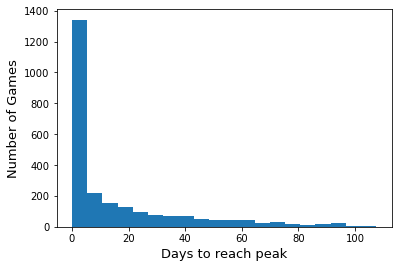

In [12]:
months = np.array(days)/30
plt.hist(months,20)
plt.xlabel('Days to reach peak', fontsize = 13)
plt.ylabel('Number of Games', fontsize = 13)


plt.show()

In [39]:
print('the number of games containing at least peak 1000 is ', len(games))

#### app id for the games
block_busters = df.loc[games]


the number of games containing at least peak 1000 is  885


In [40]:
data_original = pd.read_csv('AllData.csv')
data = data_original.copy()


In [45]:
merged = data.merge(block_busters, how = 'inner', on = 'App_id')
len(merged)


819

In [74]:
x = merged.columns.values
x = list(x[81:])
merged = merged.drop(x, axis=1)


In [76]:
merged.columns

Index(['App_id', 'Name_x', 'ReleaseDate', 'RequiredAge', 'DemoCount',
       'DeveloperCount', 'DLCCount', 'Metacritic', 'MovieCount',
       'PackageCount', 'RecommendationCount', 'PublisherCount',
       'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
       'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
       'AchievementCount', 'AchievementHighlightedCount', 'ControllerSupport',
       'IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail',
       'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec', 'CategorySinglePlayer',
       'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'Ge